In [3]:
import pandas as pd
print "Feature Adding #1:\nAdd average rating, rating count for each movie:"
df = pd.read_csv("../data/interim/movies_with_ratings.csv")
print df.head()

Feature Adding #1:
Add average rating, rating count for each movie:
   movie_id                               title  \
0         1                    Toy Story (1995)   
1         2                      Jumanji (1995)   
2         3             Grumpier Old Men (1995)   
3         4            Waiting to Exhale (1995)   
4         5  Father of the Bride Part II (1995)   

                                        genres  movie_year  avg_rating  \
0  Adventure|Animation|Children|Comedy|Fantasy        1995    3.928769   
1                   Adventure|Children|Fantasy        1995    3.208070   
2                               Comedy|Romance        1995    3.150385   
3                         Comedy|Drama|Romance        1995    2.860544   
4                                       Comedy        1995    3.077435   

   rating_cnt  
0     26449.0  
1     12032.0  
2      7790.0  
3      1764.0  
4      7135.0  


In [4]:
print "Feature Adding #2:\nAdd tag frequency for every tag(how many times the tag appears in the entire dataset):"
df = pd.read_csv("../data/interim/tags_with_frq.csv")
print df.head()

Feature Adding #2:
Add tag frequency for every tag(how many times the tag appears in the entire dataset):
   user_id  movie_id              tag          ts     ts_date  ts_year  \
0       15      4973       excellent!  1215184630  2008-07-04     2008   
1       20      1747         politics  1188263867  2007-08-28     2007   
2       20      1747           satire  1188263867  2007-08-28     2007   
3       20      2424  chick flick 212  1188263835  2007-08-28     2007   
4       20      2424            hanks  1188263835  2007-08-28     2007   

   ts_month  ts_day  tag_frq  
0         7       4        7  
1         8      28      170  
2         8      28      120  
3         8      28        3  
4         8      28        1  


In [5]:
print "Feature Adding #3:\nAdd number of tags for each movie:"
df = pd.read_csv("../data/interim/movies_with_tags.csv")
print df.head()

Feature Adding #3:
Add number of tags for each movie:
   movie_id                               title  \
0         1                    Toy Story (1995)   
1         2                      Jumanji (1995)   
2         3             Grumpier Old Men (1995)   
3         4            Waiting to Exhale (1995)   
4         5  Father of the Bride Part II (1995)   

                                        genres  movie_year  avg_rating  \
0  Adventure|Animation|Children|Comedy|Fantasy        1995    3.928769   
1                   Adventure|Children|Fantasy        1995    3.208070   
2                               Comedy|Romance        1995    3.150385   
3                         Comedy|Drama|Romance        1995    2.860544   
4                                       Comedy        1995    3.077435   

   #_rating  #_tag  #_tag_distinct  avg_tag_frq  
0     26449    140              66   115.692857  
1     12032     39              24    77.487179  
2      7790     12              10     7.000

In [12]:
print "Feature Adding #4:\nAdd reliability of ratings and tags(std of rating):"
df = pd.read_csv("../data/interim/movies_with_rating_urb.csv")
print df.head()

Feature Adding #4:
Add reliability of ratings and tags:
   movie_id                               title  \
0         1                    Toy Story (1995)   
1         2                      Jumanji (1995)   
2         3             Grumpier Old Men (1995)   
3         4            Waiting to Exhale (1995)   
4         5  Father of the Bride Part II (1995)   

                                        genres  movie_year  avg_rating  \
0  Adventure|Animation|Children|Comedy|Fantasy        1995    3.928769   
1                   Adventure|Children|Fantasy        1995    3.208070   
2                               Comedy|Romance        1995    3.150385   
3                         Comedy|Drama|Romance        1995    2.860544   
4                                       Comedy        1995    3.077435   

   #_rating  rating_std  #_tag  #_tag_distinct  avg_tag_frq  
0     26449    0.896315    140              66   115.692857  
1     12032    0.951328     39              24    77.487179  
2     

In [13]:
print "Feature Adding #5:\nSplit and categorize genres(like 'multi-hot' encoding):"
df = pd.read_csv("../data/interim/movies_with_genres_encoded.csv")
print df.head()

Feature Adding #5:
Split and categorize genres:
   movie_id                               title  \
0         1                    Toy Story (1995)   
1         2                      Jumanji (1995)   
2         3             Grumpier Old Men (1995)   
3         4            Waiting to Exhale (1995)   
4         5  Father of the Bride Part II (1995)   

                                        genres  movie_year  avg_rating  \
0  Adventure|Animation|Children|Comedy|Fantasy        1995    3.928769   
1                   Adventure|Children|Fantasy        1995    3.208070   
2                               Comedy|Romance        1995    3.150385   
3                         Comedy|Drama|Romance        1995    2.860544   
4                                       Comedy        1995    3.077435   

   #_rating  rating_std  #_tag  #_tag_distinct  avg_tag_frq  ...  genre_War  \
0     26449    0.896315    140              66   115.692857  ...          0   
1     12032    0.951328     39            

In [14]:
print "Feature Adding #6:\nExtract year from movie title:"
df = pd.read_csv("../data/interim/movies_with_years.csv")
print df.head()

Feature Adding #6:
Extract year from movie title:
   movie_id                               title  \
0         1                    Toy Story (1995)   
1         2                      Jumanji (1995)   
2         3             Grumpier Old Men (1995)   
3         4            Waiting to Exhale (1995)   
4         5  Father of the Bride Part II (1995)   

                                        genres  movie_year  
0  Adventure|Animation|Children|Comedy|Fantasy        1995  
1                   Adventure|Children|Fantasy        1995  
2                               Comedy|Romance        1995  
3                         Comedy|Drama|Romance        1995  
4                                       Comedy        1995  


In [6]:
from sklearn.preprocessing import StandardScaler
print "Data preprocessing:\nRemove outliers(rating count smaller than 10) and standardize all numeric values:"
movies = pd.read_csv('../data/processed/movies.csv')
movies = movies[movies['#_rating'] > 10]
columns_to_drop = ["movie_id", "title", "genres"]
movies.drop(columns=columns_to_drop, inplace=True, axis=1)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(movies.values)
scaled_features_df = pd.DataFrame(scaled_features, index=movies.index, columns=movies.columns)
print scaled_features_df.head()

Data preprocessing:
Remove outliers(rating count smaller than 10) and standardize all numeric values:
   movie_year  avg_rating  #_rating  rating_std     #_tag  #_tag_distinct  \
0    0.424444    1.318395  9.778165   -0.457183  6.523612        4.754374   
1    0.424444    0.003569  4.230548   -0.105276  1.461029        1.351544   
2    0.424444   -0.101670  2.598240    0.239073  0.107666        0.217267   
3    0.424444   -0.630449  0.279454    0.766913 -0.443705       -0.511911   
4    0.424444   -0.234758  2.346198   -0.018463  0.408413        0.379306   

   avg_tag_frq  genre_Mystery  genre_Romance  genre_IMAX  ...  genre_War  \
0     0.328820      -0.228021      -0.437959   -0.051015  ...  -0.220098   
1    -0.042845      -0.228021      -0.437959   -0.051015  ...  -0.220098   
2    -0.728545      -0.228021       2.283320   -0.051015  ...  -0.220098   
3    -0.786913      -0.228021       2.283320   -0.051015  ...  -0.220098   
4    -0.350234      -0.228021      -0.437959   -0.05101

frequency distribution for all the ratings:


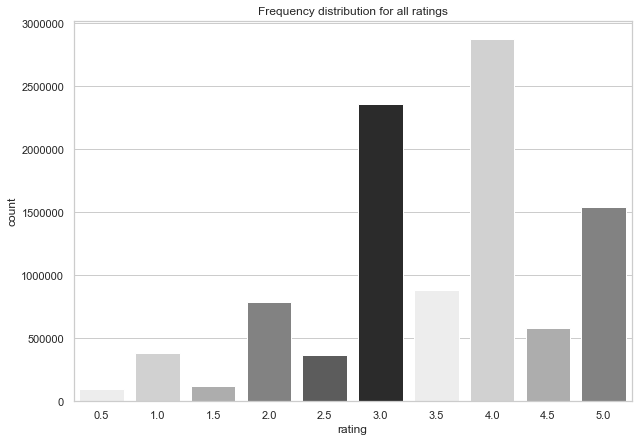

In [15]:
print "frequency distribution for all the ratings:"
ratings_csv = pd.read_csv('../data/interim/ratings_with_dates.csv')
sns.set(rc={'figure.figsize': (10, 7)})
sns.set_style('whitegrid')
ax = sns.countplot(x='rating', data=ratings_csv, palette=sns.color_palette('Greys'))
ax.set(xlabel='rating', ylabel='count')
ax.set_title("Frequency distribution for all ratings")
plt.show()

distribution of count of ratings per movie:


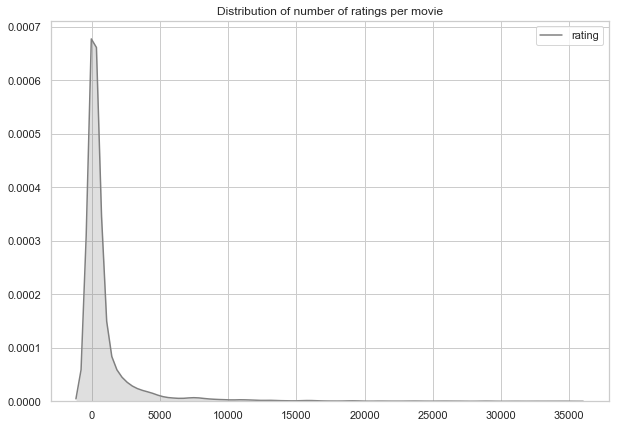

In [16]:
print "distribution of count of ratings per movie:"
movie_rating_count = ratings_csv.groupby('movie_id')['rating'].count()
ax = sns.kdeplot(movie_rating_count, shade=True, color='grey')
ax.set_title("Distribution of number of ratings per movie")
plt.show()

distribution of ratings std:


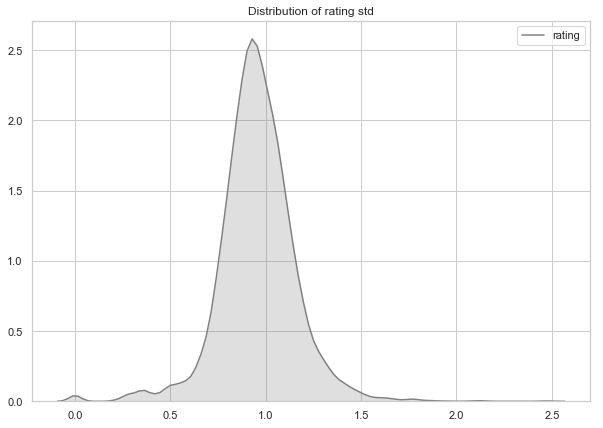

In [17]:
print "distribution of ratings std:"
unreliability_ratings = ratings_csv.groupby('movie_id')['rating'].std()
unreliability_ratings.dropna(inplace=True)
ax = sns.kdeplot(unreliability_ratings, shade=True, color='grey')
ax.set_title("Distribution of rating std")
plt.show()

Pearson correlation of features:


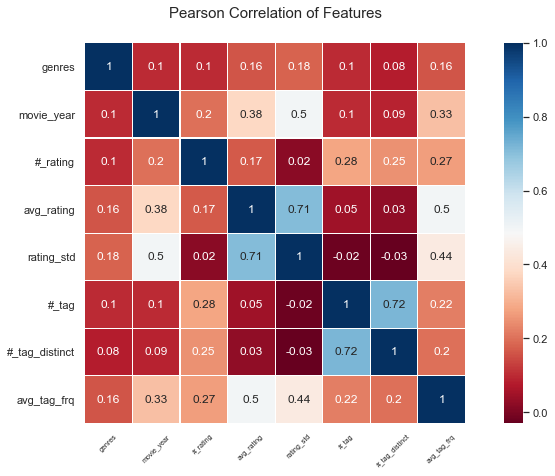

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
print "Pearson correlation of features:"
movies = pd.read_csv('../data/processed/movies.csv')

corr_columns = ["genres", "movie_year", "#_rating", "avg_rating", "rating_std", "#_tag", "#_tag_distinct", "avg_tag_frq"]
corr = movies[corr_columns].apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1).round(decimals=2)
colormap = plt.cm.RdBu
plt.figure(figsize=(14, 7))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(corr, linewidths=0.1, vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)
plt.xticks(rotation=45, fontsize=7)

plt.show()